In [1]:
!pip install --upgrade pip setuptools wheel
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
# for google colab users, please restart the runtime after this cell is done

     |████████████████████████████████| 1.6 MB 5.3 MB/s 
     |████████████████████████████████| 819 kB 28.1 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.2.0
    Uninstalling setuptools-57.2.0:
      Successfully uninstalled setuptools-57.2.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.5).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 1s (238 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 160837 files and directories currently installed.)
Preparing to 

In [1]:
!pip install pycombo
!pip install geopandas

distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 133 kB 5.4 MB/s 
  distutils: /usr/lib/python3/dist-packages
  sysconfig: /usr/lib/python3.7/site-packages
  user = False
  home = None
  root = None
  prefix = None
  distutils: /usr/lib/python3/dist-packages
  sysconfig: /usr/lib/python3.7/site-packages
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached importlib_metadata-1.7.0-py2.py3-none-any.whl (31 kB)
     |████████████████████████████████| 199 kB 33.7 MB/s 
  Created wheel for pycombo: filename

In [2]:
#add necessary libraries
import pycombo # combo community detection package
import networkx as nx #library supporting networks
from networkx.algorithms import community
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
#make sure plots are embedded into the notebook
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [3]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
G = nx.read_gml('lesmis.gml') 

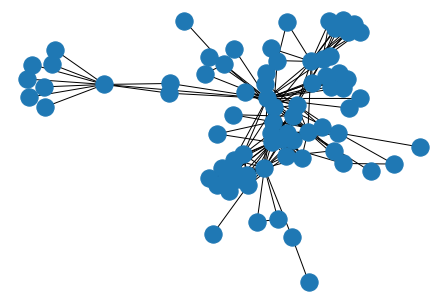

In [4]:
random.seed(2015)
nx.draw(G,pos=None)

In [5]:
def modularity(G, partition, correctLoops = False): #modularity of the networkx graph given partition dictionary; correctLoop - special flag to account for inconsistency in loop edge definition in some graphs
    A = np.array(nx.adjacency_matrix(G).todense(), dtype = float)
    if correctLoops and not isinstance(G,nx.DiGraph):
        A += np.diag(np.diag(A))
    wout = A.sum(axis=1)
    win = A.sum(axis=0)
    T = wout.sum()
    Q = A / T - np.matmul(wout.reshape(-1, 1), win.reshape(1, -1)) / (T ** 2)
    C = np.array([partition[n] for n in G.nodes()]) #could there be an indexing mismatch between Q and C
    return (Q * (C.reshape(-1,1) == C.reshape(1,-1))).sum()

In [6]:
def sets2dictPartition(spart): #convert list of partitions to dictionary
    part={}
    c=1
    for cset in spart:
        cpart={n:c for n in cset}
        part.update(cpart)
        c+=1
    return part   

In [7]:
PLKarate=community.greedy_modularity_communities(G)

In [8]:
PLKarate

[frozenset({'Brevet',
            'Champmathieu',
            'Champtercier',
            'Chenildieu',
            'Cochepaille',
            'Count',
            'CountessDeLo',
            'Cravatte',
            'Fauchelevent',
            'Geborand',
            'Gervais',
            'Gribier',
            'Isabeau',
            'Judge',
            'Labarre',
            'Marguerite',
            'MlleBaptistine',
            'MmeDeR',
            'MmeMagloire',
            'MotherInnocent',
            'Myriel',
            'Napoleon',
            'OldMan',
            'Scaufflaire',
            'Valjean',
            'Woman1'}),
 frozenset({'Bahorel',
            'Bossuet',
            'Child1',
            'Child2',
            'Combeferre',
            'Courfeyrac',
            'Enjolras',
            'Feuilly',
            'Gavroche',
            'Grantaire',
            'Joly',
            'Jondrette',
            'Mabeuf',
            'MmeBurgon',
            'MmeHuchelou

In [9]:
PLKarate=sets2dictPartition(PLKarate); PLKarate

{'Anzelma': 3,
 'Babet': 3,
 'Bahorel': 2,
 'Bamatabois': 3,
 'BaronessT': 4,
 'Blacheville': 5,
 'Bossuet': 2,
 'Boulatruelle': 3,
 'Brevet': 1,
 'Brujon': 3,
 'Champmathieu': 1,
 'Champtercier': 1,
 'Chenildieu': 1,
 'Child1': 2,
 'Child2': 2,
 'Claquesous': 3,
 'Cochepaille': 1,
 'Combeferre': 2,
 'Cosette': 4,
 'Count': 1,
 'CountessDeLo': 1,
 'Courfeyrac': 2,
 'Cravatte': 1,
 'Dahlia': 5,
 'Enjolras': 2,
 'Eponine': 3,
 'Fameuil': 5,
 'Fantine': 3,
 'Fauchelevent': 1,
 'Favourite': 5,
 'Feuilly': 2,
 'Gavroche': 2,
 'Geborand': 1,
 'Gervais': 1,
 'Gillenormand': 4,
 'Grantaire': 2,
 'Gribier': 1,
 'Gueulemer': 3,
 'Isabeau': 1,
 'Javert': 3,
 'Joly': 2,
 'Jondrette': 2,
 'Judge': 1,
 'Labarre': 1,
 'Listolier': 5,
 'LtGillenormand': 4,
 'Mabeuf': 2,
 'Magnon': 4,
 'Marguerite': 1,
 'Marius': 4,
 'MlleBaptistine': 1,
 'MlleGillenormand': 4,
 'MlleVaubois': 4,
 'MmeBurgon': 2,
 'MmeDeR': 1,
 'MmeHucheloup': 2,
 'MmeMagloire': 1,
 'MmePontmercy': 4,
 'MmeThenardier': 3,
 'Montparnass

In [10]:
PCKarate, PCKarate_mod = pycombo.execute(G, max_communities = 0) #combo partition
PCKarate_mod

0.560008370016743

In [11]:
#visualize network partitioning given node locations pos
def visualizePartition(G,partition,pos):
    N=len(G.nodes())
    s=4+4*int(log10(N))
    plt.figure(figsize=(s,s))
    PN=max(partition.values())
    my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1)) #create a colormap for a given number of communities
    c=[]
    for n in G.nodes():
        c.append(1.0*partition[n]/PN)
    nx.draw(G,pos=pos,with_labels=False,arrows=True,node_size=300,node_color=c,width=1,edge_color='black')

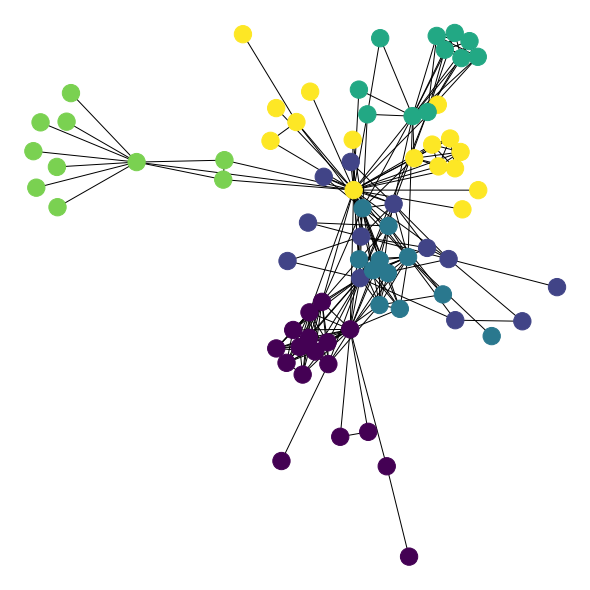

In [12]:
random.seed(2015)
visualizePartition(G,PCKarate,None)

In [14]:
cities = pd.read_csv('citiesTable.csv', index_col=0 )
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [15]:
#create a network with city names as nodes
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)

In [16]:
#now read the links
links = pd.read_csv('citiesToCities.csv' , index_col=None )
links.head()

,departure city,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
0,Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
1,Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
2,Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
3,Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
4,Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [17]:
#create list of edges as tuples
EN=len(links.index)
edgelist=[(links['departure city'][j],links['arrival city'][j]) for j in range(EN)]

In [18]:
#add edges to the network
Flights.add_edges_from(edgelist)

Partition the network using Combo algorithm, visualize the partition

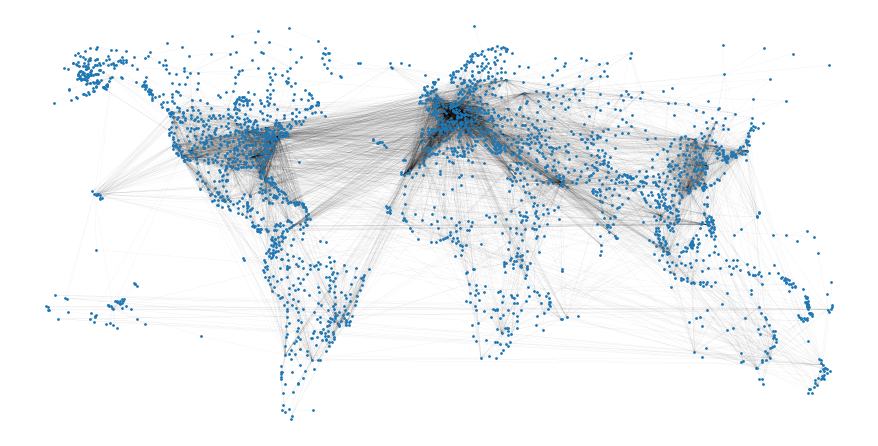

In [19]:
CityPos={c:(cities['long. most active airport'][c],cities['lat. most active airport'][c])
         for c in cities.index}
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False,arrows=False,style='dotted',node_size=3,width=0.05,edge_color='black')

In [20]:
PCKarate1, PCKarate_mod1 = pycombo.execute(Flights, max_communities = 0) #combo partition
PCKarate_mod1

0.6604368369722444

In [21]:
#visualize network partitioning given node locations pos
def visualizePartition2(Flights,partition,CityPos):
    N=len(Flights.nodes())
    s=4+4*int(log10(N))
    plt.figure(figsize=(s*2,s))
    PN=max(partition.values())
    my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1)) #create a colormap for a given number of communities
    c=[]
    for n in Flights.nodes():
        c.append(1.0*partition[n]/PN)
    nx.draw(Flights,pos=CityPos,with_labels=False,arrows=False,style='dotted',node_size=30,node_color=c,width=0.3,edge_color='black')

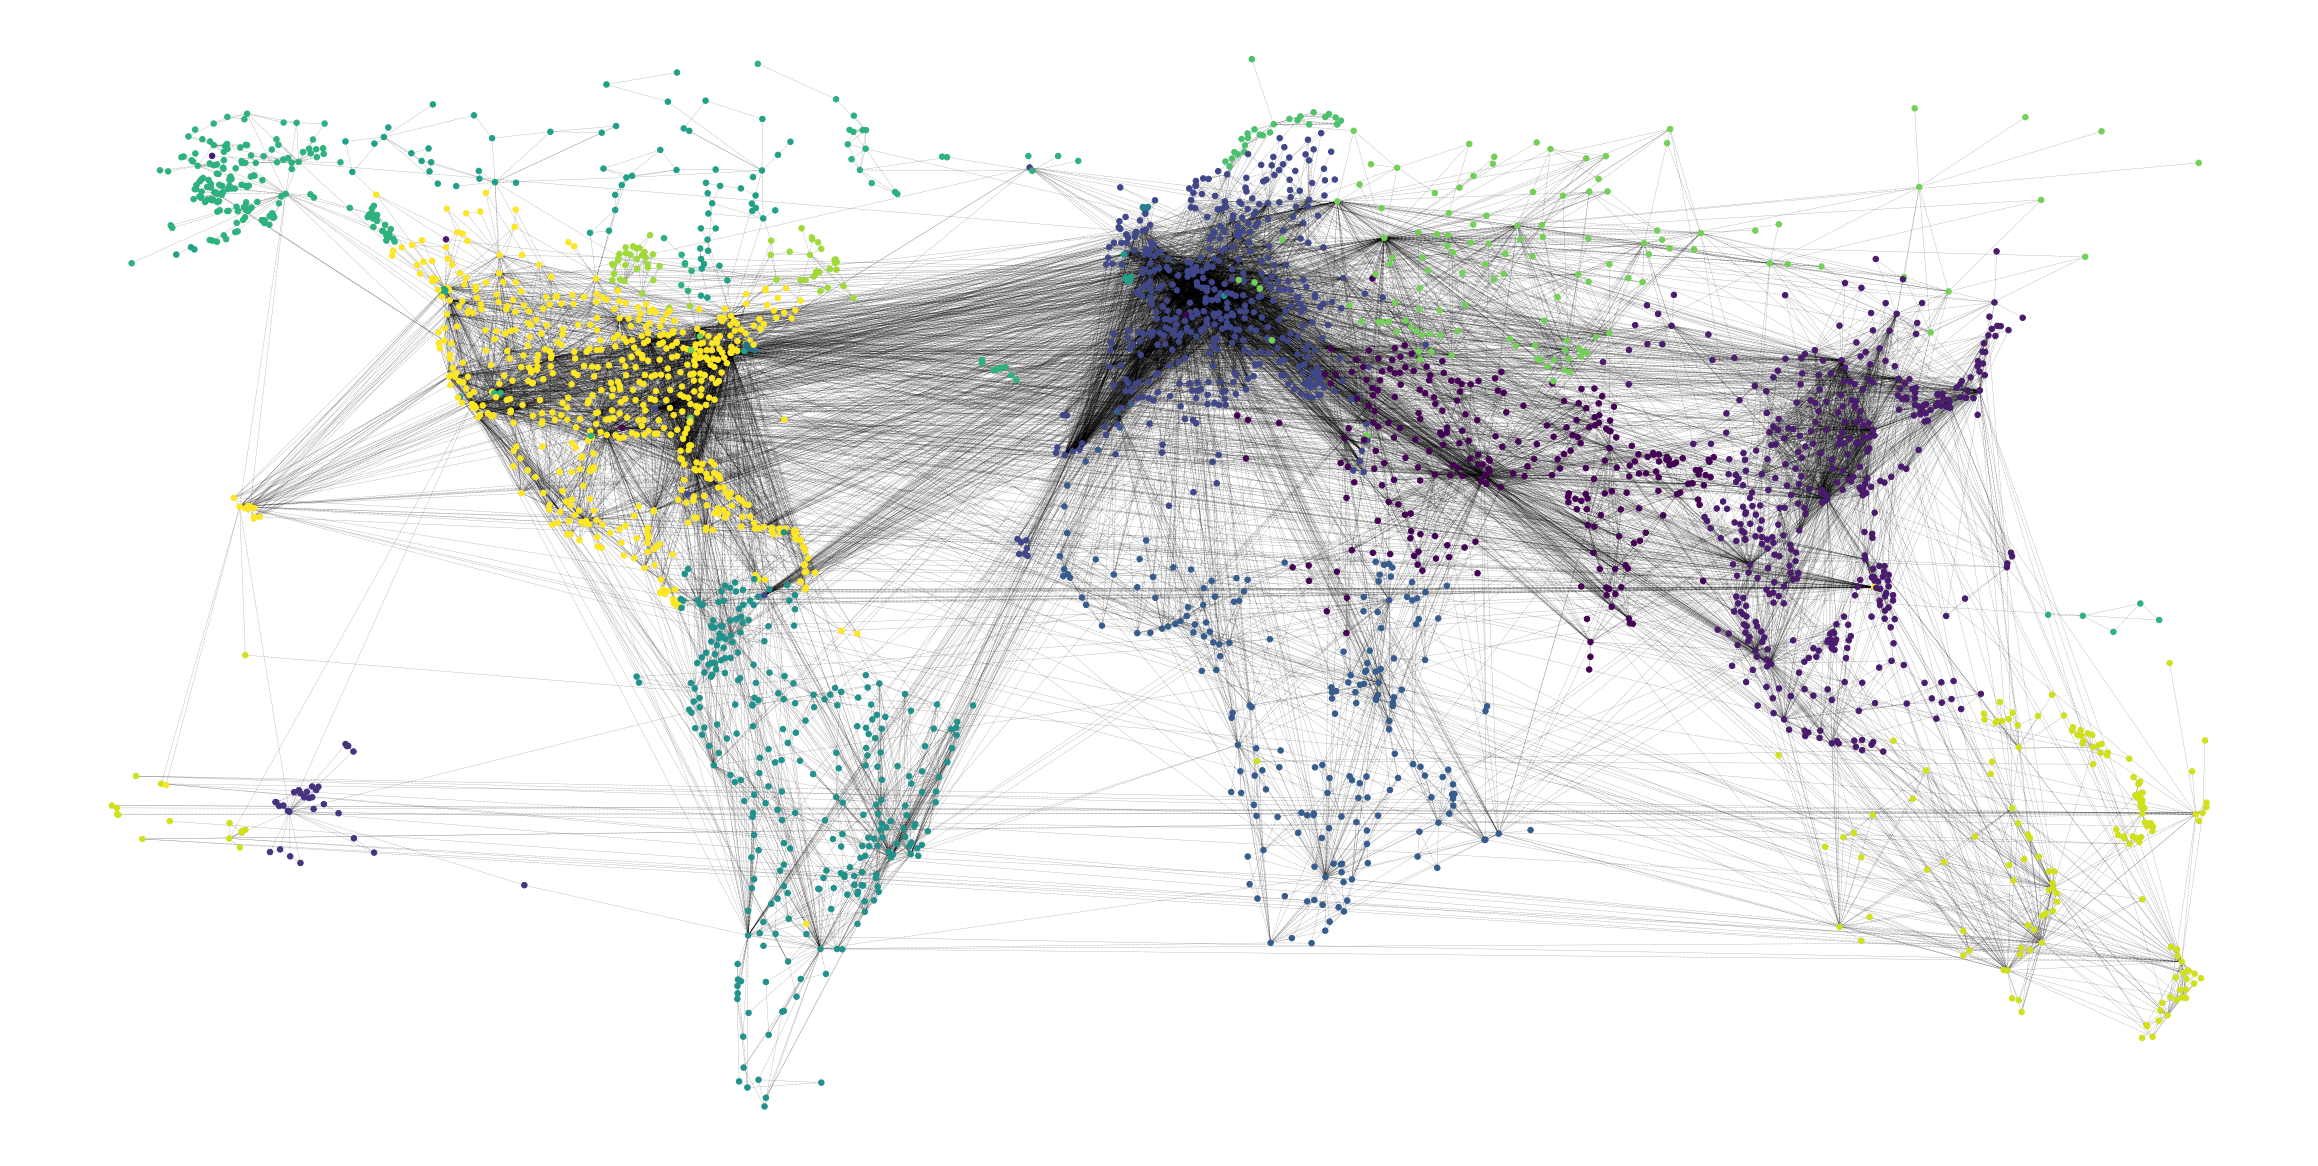

In [22]:
visualizePartition2(Flights,PCKarate1,CityPos)